In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [3]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [4]:
countries.shape

(252, 2)

In [5]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [6]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [7]:
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [8]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

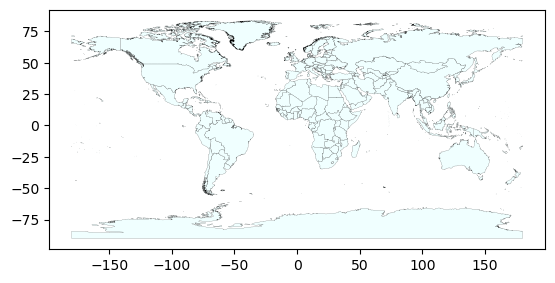

In [9]:
countries.plot(facecolor="azure",
               edgecolor='black', 
               linewidth=0.1) 

In [10]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [ ]:
#Mapa de los ríos: 

<Axes: >

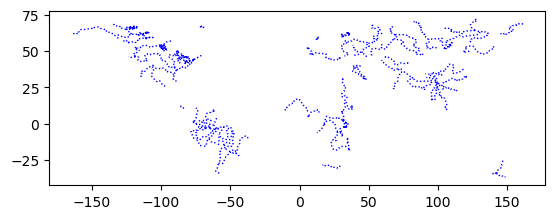

In [11]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

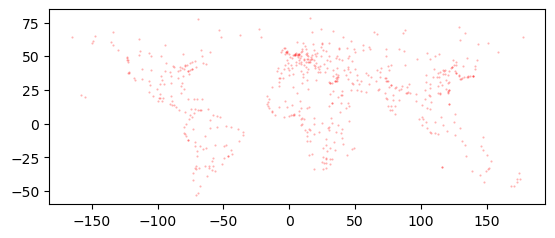

In [12]:
cities.plot(marker='.', 
            color='red',
            markersize=1,
            alpha=0.3) 

In [13]:
countries.crs==cities.crs==cities.crs

True

<Axes: >

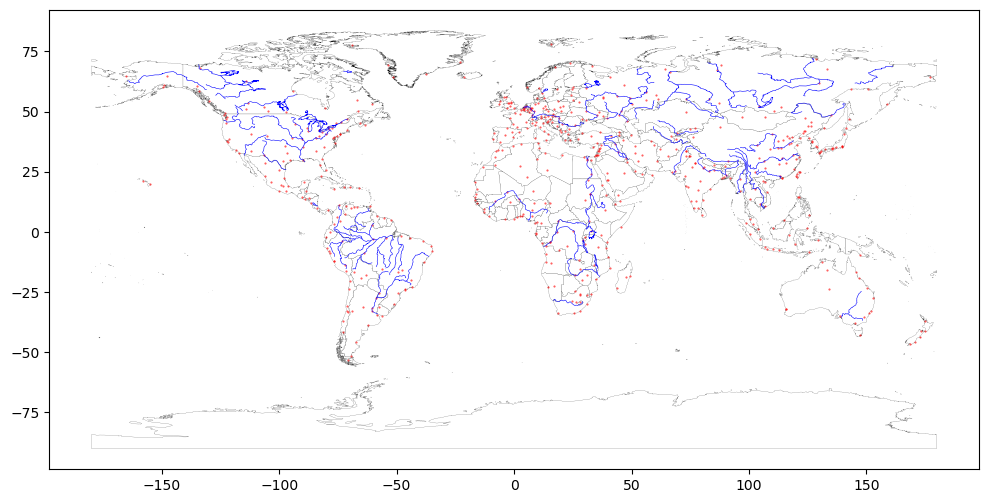

In [14]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) 

In [15]:
countries.to_file(os.path.join("maps","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("maps","worldMap.gpkg"),layer='cityPoints', driver="GPKG")